# PART-A
## 1. Import and Understand the data [12 Marks]
### A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]
Hint: You can extract it Manually by losing 2 marks

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
import os
import cv2
import zipfile
from zipfile import ZipFile

In [2]:
# Extracting plant-seedlings-classification.zip file using python
zip_file_path='plant-seedlings-classification.zip'
with ZipFile(zip_file_path, 'r') as zip:
  zip.extractall()

In [3]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 4EAB-7A9D

 Directory of C:\Users\srile\Desktop\AIML\Project_CNN

18-09-2022  07:00    <DIR>          .
10-09-2022  11:26    <DIR>          ..
10-09-2022  11:25    <DIR>          .ipynb_checkpoints
10-09-2022  11:49    <DIR>          __MACOSX
11-09-2022  11:20    <DIR>          17flowers
17-09-2022  23:44        26,829,112 cnn_model.h5
17-09-2022  23:44         8,958,240 cnn_model_weights.h5
10-09-2022  10:56           314,332 CV+1-+Problem_Statement.pdf
10-09-2022  10:55           174,823 CV1+FAQ.pdf
10-09-2022  10:56           486,692 CV1-+Milestones.pdf
10-09-2022  11:49    <DIR>          plant-seedlings-classification
10-09-2022  11:13     1,720,926,126 plant-seedlings-classification.zip
10-09-2022  10:56            35,126 Prediction.jpg
18-09-2022  07:00         3,332,768 Untitled.ipynb
               8 File(s)  1,761,057,219 bytes
               6 Dir(s)  74,727,727,104 bytes free


plant-seedlings-classification.zip is extracted as shown above.

### B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]
Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..

In [4]:
data_folder = 'plant-seedlings-classification'
seedlings_list = []
labels = []

# list all folders inside train directory
for sub_folder in os.listdir(data_folder):
    if sub_folder=='train':   #getting files with label train  
      print("Inside train folder..")  
      for class_name in os.listdir(os.path.join(data_folder, sub_folder)):
        # read each image inside train directory one by one
        if class_name != '.DS_Store':
            print("Extracting images from folder : {}".format(class_name))
            for image in os.listdir(os.path.join(data_folder,sub_folder,class_name)):
                seedlings_dict={}
                seedlings_dict["img_name"] = image
                seedlings_dict["img_class"] = class_name
                image = cv2.imread(os.path.join(data_folder,sub_folder,class_name,image))
                seedlings_dict["img"]=image
                seedlings_list.append(seedlings_dict)


Inside train folder..
Extracting images from folder : Black-grass
Extracting images from folder : Charlock
Extracting images from folder : Cleavers
Extracting images from folder : Common Chickweed
Extracting images from folder : Common wheat
Extracting images from folder : Fat Hen
Extracting images from folder : Loose Silky-bent
Extracting images from folder : Maize
Extracting images from folder : Scentless Mayweed
Extracting images from folder : Shepherds Purse
Extracting images from folder : Small-flowered Cranesbill
Extracting images from folder : Sugar beet


In [5]:
#converting seedlings_list which is a list of dictionaries to pandas df
seedlings_df=pd.DataFrame(seedlings_list)
seedlings_df

,img_name,img_class,img
0,0050f38b3.png,Black-grass,"[[[27, 50, 80], [18, 42, 71], [36, 57, 83], [4..."
1,0183fdf68.png,Black-grass,"[[[37, 43, 55], [37, 43, 54], [40, 46, 57], [4..."
2,0260cffa8.png,Black-grass,"[[[24, 32, 45], [21, 30, 44], [22, 30, 45], [2..."
3,05eedce4d.png,Black-grass,"[[[51, 84, 108], [56, 89, 112], [54, 88, 110],..."
4,075d004bc.png,Black-grass,"[[[165, 162, 162], [165, 161, 163], [160, 157,..."
...,...,...,...
4745,fc293eacb.png,Sugar beet,"[[[98, 94, 97], [93, 88, 94], [87, 82, 86], [8..."
4746,fc441208c.png,Sugar beet,"[[[35, 63, 92], [38, 67, 96], [34, 64, 94], [1..."
4747,fed9406b2.png,Sugar beet,"[[[44, 56, 72], [52, 63, 75], [53, 65, 75], [4..."
4748,fef5e7066.png,Sugar beet,"[[[144, 141, 145], [143, 139, 143], [146, 142,..."


In [6]:
seedlings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   img_name   4750 non-null   object
 1   img_class  4750 non-null   object
 2   img        4750 non-null   object
dtypes: object(3)
memory usage: 111.5+ KB


The pandas dataframe is created with 3 columns: <br> 
img_name - Name of image <br>
img_class - Species/class/type of image <br>
img - actual image 

In [7]:
# Let's see the various classes available in the pandas dataframe along with the counts..
seedlings_df['img_class'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: img_class, dtype: int64

### C. Write a function that will select n random images and display images along with its species. [4 Marks]
Hint: If input for function is 5, it should print 5 random images along with its labels.

In [8]:
### Function to select n random images and display images along with its species name
def img_display(df,n):
    # visualizing the random images in the dataset along with their labels
    x=df['img'].tolist()
    y=df['img_class'].tolist()
    
    # Visualization
    import matplotlib.pyplot as plt 
    import numpy as np
    rand = np.random.randint(0, len(x), n) # Generating n random numbers from total number of images
    print(rand)
    plt.figure(figsize=(20, 20))
    for i,j in enumerate(rand):
        plt.subplot(1, len(rand), i+1)
        plt.imshow(x[j])
        plt.title("{}".format(y[j]))
        plt.axis('off')
    plt.show()

[2846 3099  894 3458 4725 1577 3622  299 2727 4050]


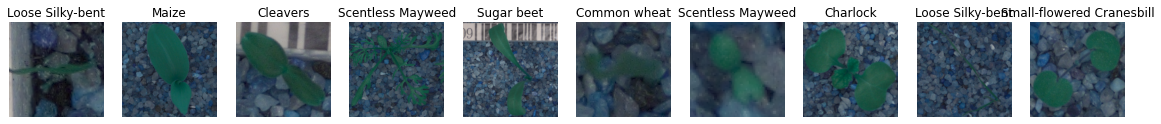

In [9]:
## calling the function for seedlings_df and random number 10 - to display 10 images
img_display(seedlings_df,10)

## 2. Data preprocessing [8 Marks]
### A. Create X & Y from the DataFrame. [2 Marks]

In [10]:
# Creating x and y from the dataframe
X=seedlings_df[['img']]
y=seedlings_df[['img_class']]

In [11]:
y.describe()

,img_class
count,4750
unique,12
top,Loose Silky-bent
freq,654


In [12]:
y.head()

,img_class
0,Black-grass
1,Black-grass
2,Black-grass
3,Black-grass
4,Black-grass


In [13]:
X.head()

,img
0,"[[[27, 50, 80], [18, 42, 71], [36, 57, 83], [4..."
1,"[[[37, 43, 55], [37, 43, 54], [40, 46, 57], [4..."
2,"[[[24, 32, 45], [21, 30, 44], [22, 30, 45], [2..."
3,"[[[51, 84, 108], [56, 89, 112], [54, 88, 110],..."
4,"[[[165, 162, 162], [165, 161, 163], [160, 157,..."


In [14]:
X.shape

(4750, 1)

In [15]:
y.shape

(4750, 1)

### B. Encode labels of the images. [2 Marks]

In [16]:
## Encoding labels of the images
from tensorflow.keras.utils import to_categorical
classes = y.iloc[:,0].unique()

labels = preprocessing.LabelEncoder()

labels.fit(classes)
encodedlabels = labels.transform(y.iloc[:,0])
print("Encoded labels are : \n{}".format(encodedlabels))

print('\nClasses            : \n{}'.format(str(labels.classes_)))
class_dict={l: i for (i, l) in enumerate(labels.classes_)}
print('\nClass dictionary   : \n{}'.format(class_dict))
y=to_categorical(encodedlabels)
print("\ny after encoding   : \n{}".format(y))

Encoded labels are : 
[ 0  0  0 ... 11 11 11]

Classes            : 
['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

Class dictionary   : 
{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}

y after encoding   : 
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### C. Unify shape of all the images. [2 Marks]

In [17]:
# Lets us first see the current dimensions of the images
img_shape=[]
for image in X.img.values:
    img_shape.append(image.shape)
    
dimension = pd.DataFrame({'dim':img_shape})

In [18]:
dimension.head(10)

,dim
0,"(196, 196, 3)"
1,"(388, 388, 3)"
2,"(886, 886, 3)"
3,"(117, 117, 3)"
4,"(471, 471, 3)"
5,"(1074, 1074, 3)"
6,"(251, 251, 3)"
7,"(1899, 1900, 3)"
8,"(531, 531, 3)"
9,"(352, 352, 3)"


The images have different dimensions..

In [19]:
#Lets unify the shape of all images to (80,80,3)
image_new=[]
image_reshape=[]

for image in X.img.values:
    image = cv2.resize(image, (80, 80))  
    image_new.append(image)
    image_reshape.append(image.shape)
    
# lets create a dataframe to see the images and its dimensions    
X_new = pd.DataFrame({'img':image_new, 'dim':image_reshape})

In [20]:
X_new.head()

,img,dim
0,"[[[22, 45, 76], [44, 65, 88], [63, 82, 102], [...","(80, 80, 3)"
1,"[[[44, 50, 57], [48, 51, 66], [52, 63, 80], [9...","(80, 80, 3)"
2,"[[[26, 35, 52], [25, 33, 54], [32, 45, 61], [3...","(80, 80, 3)"
3,"[[[50, 83, 107], [52, 86, 109], [53, 87, 110],...","(80, 80, 3)"
4,"[[[169, 168, 167], [165, 165, 163], [171, 169,...","(80, 80, 3)"


The images are reshaped to (80,80,3)

In [21]:
X = np.array(X_new['img'].tolist())

In [22]:
X.shape

(4750, 80, 80, 3)

In [23]:
print(X.shape, y.shape)

(4750, 80, 80, 3) (4750, 12)


### D. Normalise all the images. [2 Marks]

In [24]:
# Normalizing the images by dividing it by 255
X = X.astype('float32')
X = X/255

In [25]:
X

array([[[[0.08627451, 0.1764706 , 0.29803923],
         [0.17254902, 0.25490198, 0.34509805],
         [0.24705882, 0.32156864, 0.4       ],
         ...,
         [0.2509804 , 0.30588236, 0.35686275],
         [0.22352941, 0.30588236, 0.34901962],
         [0.22352941, 0.3254902 , 0.35686275]],

        [[0.10196079, 0.19607843, 0.32156864],
         [0.20392157, 0.2784314 , 0.3764706 ],
         [0.16078432, 0.23529412, 0.32941177],
         ...,
         [0.23529412, 0.2901961 , 0.34117648],
         [0.22745098, 0.28235295, 0.32941177],
         [0.23529412, 0.29411766, 0.34117648]],

        [[0.12156863, 0.21568628, 0.3372549 ],
         [0.12156863, 0.2       , 0.31764707],
         [0.1254902 , 0.20392157, 0.30588236],
         ...,
         [0.24705882, 0.29803923, 0.3529412 ],
         [0.21960784, 0.26666668, 0.31764707],
         [0.21960784, 0.2784314 , 0.32941177]],

        ...,

        [[0.6117647 , 0.58431375, 0.56078434],
         [0.6117647 , 0.58431375, 0.5647059 ]

In [26]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## 3. Model training [10 Marks]
Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.
### A. Split the data into train and test data. [2 Marks]

In [27]:
# Splitting the data into train and test by 80:20 proportion
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (3800, 80, 80, 3)
Shape of X_test: (950, 80, 80, 3)
Shape of y_train: (3800, 12)
Shape of y_test: (950, 12)


In [29]:
# no.of classes
num_class_train = y_train.shape[1] 
print("The number of classes in train data:",num_class_train)

The number of classes in train data: 12


In [30]:
# no.of classes
num_class_test = y_test.shape[1] 
print("The number of classes in test data:",num_class_test)

The number of classes in test data: 12


### B. Create new CNN architecture to train the model. [4 Marks]

In [31]:
# create the CNN model for plant seedlings data
num_classes=num_class_train
def create_cnn_model():  
    # Initialising the CNN classifier
    cnn_model = Sequential()

    # Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    cnn_model.add(Conv2D(32, (3, 3), input_shape = (80, 80, 3), activation = 'relu'))
    cnn_model.add(BatchNormalization(axis=3))

    # Add a Max Pooling layer of size 2X2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))


    # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    cnn_model.add(Conv2D(64, (3, 3), activation = 'relu'))

    # Adding another pooling layer
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(BatchNormalization(axis=3))
    cnn_model.add(Dropout(0.25))
    
    # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    cnn_model.add(Conv2D(128, (3, 3), activation = 'relu'))

    # Adding another pooling layer
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(BatchNormalization(axis=3))
    cnn_model.add(Dropout(0.25))
   
    # Flattening the layer before fully connected layers
    cnn_model.add(Flatten())

    # Adding a fully connected layer with 512 neurons
    cnn_model.add(Dense(units = 256, activation = 'relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.5))


    # Adding a fully connected layer with 128 neurons
    cnn_model.add(Dense(units = 128, activation = 'relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.4))


    # The final output layer with 5 neuron to predict the categorical classifcation
    cnn_model.add(Dense(units = 12, activation = 'softmax'))
    
    # Compile the network :
    optimizer = tf.keras.optimizers.Adam()
    cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    cnn_model.summary()
    return cnn_model

### C. Train the model on train data and validate on test data. [2 Marks]

In [32]:
# Best suitable parameters for this model can be 
epoch = 50
batch_size = 128
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=6,verbose=1, factor=0.5,min_lr=0.00001)


In [33]:
# Train the CNN classifier model for Plant seedlings data
cnn_model = create_cnn_model()
psc_cnn_model = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=batch_size,verbose=2,callbacks=[learning_rate_reduction])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 78, 78, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                        

Epoch 35/50
30/30 - 27s - loss: 0.0457 - accuracy: 0.9897 - val_loss: 0.5158 - val_accuracy: 0.8505 - lr: 5.0000e-04 - 27s/epoch - 911ms/step
Epoch 36/50
30/30 - 27s - loss: 0.0472 - accuracy: 0.9876 - val_loss: 0.5833 - val_accuracy: 0.8411 - lr: 5.0000e-04 - 27s/epoch - 914ms/step
Epoch 37/50
30/30 - 28s - loss: 0.0529 - accuracy: 0.9858 - val_loss: 0.7941 - val_accuracy: 0.8126 - lr: 5.0000e-04 - 28s/epoch - 922ms/step
Epoch 38/50
30/30 - 28s - loss: 0.0487 - accuracy: 0.9879 - val_loss: 0.6215 - val_accuracy: 0.8368 - lr: 5.0000e-04 - 28s/epoch - 941ms/step
Epoch 39/50
30/30 - 30s - loss: 0.0443 - accuracy: 0.9882 - val_loss: 0.8723 - val_accuracy: 0.7842 - lr: 5.0000e-04 - 30s/epoch - 996ms/step
Epoch 40/50
30/30 - 29s - loss: 0.0439 - accuracy: 0.9895 - val_loss: 0.6470 - val_accuracy: 0.8200 - lr: 5.0000e-04 - 29s/epoch - 982ms/step
Epoch 41/50

Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
30/30 - 34s - loss: 0.0427 - accuracy: 0.9887 - val_loss: 

In [34]:
psc_cnn_model_result = cnn_model.evaluate(X_test, y_test)

30/30 [==============================] - 2s 77ms/step - loss: 0.5416 - accuracy: 0.8568


In [35]:
print('Test loss: ', psc_cnn_model_result[0])
print('Test accuracy: ', psc_cnn_model_result[1])

Test loss:  0.5416200757026672
Test accuracy:  0.8568421006202698


The model has produced 99.50% Train accuracy and 85.68% Test accuracy
It has 2% Train loss and and 54% Test loss.
The model looks promising to predict the plan seedlings classification.

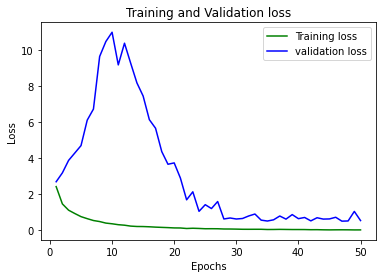

In [36]:
loss_train = psc_cnn_model.history['loss']
loss_val = psc_cnn_model.history['val_loss']
epochs = range(1,epoch+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

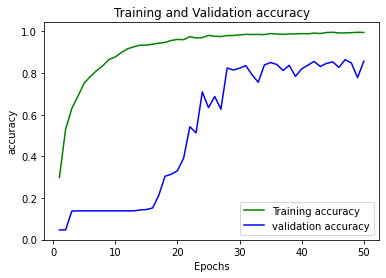

In [37]:
Acc_train = psc_cnn_model.history['accuracy']
Acc_val = psc_cnn_model.history['val_accuracy']
epochs = range(1,epoch+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [38]:
# Saving the model for future use
cnn_model.save('./cnn_model.h5')
cnn_model.save_weights('./cnn_model_weights.h5')

### D. Select a random image and print actual label and predicted label for the same. [2 Marks]

In [39]:
# Selectinga random image 
test_image = cv2.imread('./plant-seedlings-classification/train/Maize/1b1ab91eb.png')

# Resize the image to 80*80 shape to be compatible with the model
test_image = cv2.resize(test_image,(80,80))
print("Shape of the test_image : {}".format(test_image.shape))

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)

# Normalizing the image to be compatible with model
test_image =test_image*1/255.0
print('After expand_dims: {}'.format(test_image.shape))

cnn_model.compile(run_eagerly=True)

#Predict result of the test image
test_result = cnn_model.predict(test_image)

Y_pred_classes = np.argmax(test_result,axis = 1)
print("Y_pred_classes :{}".format(Y_pred_classes))

Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'species':Y_pred_df})
results_data

Shape of the test_image : (80, 80, 3)
After expand_dims: (1, 80, 80, 3)
1/1 [==============================] - 0s 49ms/step
Y_pred_classes :[7]


,species
0,Maize


#### A random image /plant-seedlings-classification/train/Maize/1b1ab91eb.png was selected under the class Maize. The model has correctly identified the picture as Maize. This concludes the model is good enough to classify the plan seedlings.

# PART-B
## 1. Import and Understand the data [5 Marks]
### A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]
Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.
It can be loaded using: x, y = oxflower17.load_data()

In [40]:
import warnings
warnings.filterwarnings('ignore')

from tflearn.datasets import oxflower17
x, y = oxflower17.load_data()


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [41]:
print("Shape of x : {}".format(x.shape))
print("Shape of y : {}".format(y.shape)) 

Shape of x : (1360, 224, 224, 3)
Shape of y : (1360,)


The dataset is loaded and split into x and y

## B. Print Number of images and shape of the images. [1 Marks]

In [42]:
print("Shape of x : {}".format(x.shape))
print("Shape of y : {}".format(y.shape)) 

Shape of x : (1360, 224, 224, 3)
Shape of y : (1360,)


In [43]:
# Lets us first see the current dimensions of the images
img_shape=[]
for image in x:
    img_shape.append(image.shape)
    
dimension = pd.DataFrame({'dim':img_shape})

In [44]:
dimension['dim'].unique()

array([(224, 224, 3)], dtype=object)

In [45]:
dimension['dim'].value_counts()

(224, 224, 3)    1360
Name: dim, dtype: int64

In [46]:
print("Number of images in the dataset : {}".format(x.shape[0]))
print("Shape of the images are width : {}, height : {},channels : {}".format(x.shape[1],x.shape[2],x.shape[3]))

Number of images in the dataset : 1360
Shape of the images are width : 224, height : 224,channels : 3


### C. Print count of each class from y. [2 Marks]

In [47]:
y_df = pd.DataFrame(y, columns = ['classes'])

In [48]:
print("Count of each class:")
y_df['classes'].sort_values().value_counts()

Count of each class:


0     80
9     80
15    80
14    80
13    80
12    80
11    80
10    80
8     80
1     80
7     80
6     80
5     80
4     80
3     80
2     80
16    80
Name: classes, dtype: int64

## 2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]
### A. Display 5 random images. [1 Marks]

In [49]:
def image_display(x,y,n):
    # Visualization
    import matplotlib.pyplot as plt
    import numpy as np
    rand = np.random.randint(0, len(x), n) # Generating random numbers out of total number of flowers
    print(rand)
    plt.figure(figsize=(20, 20))
    for i,j in enumerate(rand):
        plt.subplot(1, len(rand), i+1)
        plt.imshow(x[j])  # greens, reds, blues, rgb
        plt.title("{}".format(y[j]))
        plt.axis('off')
    plt.show()

[ 348  475  441  845 1283]


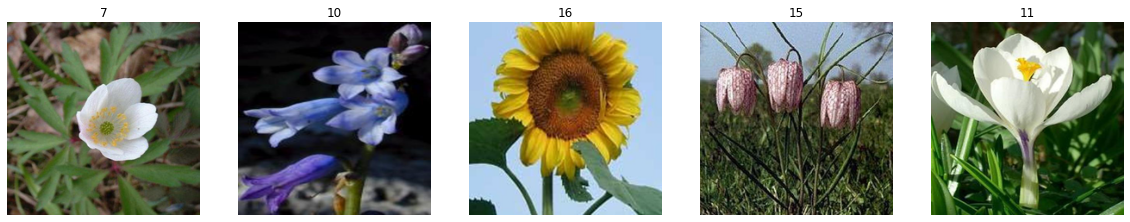

In [50]:
# calling the function
image_display(x,y,5)

### B. Select any image from the dataset and assign it to a variable. [1 Marks]

Random int : 386


Text(0.5, 1.0, '8')

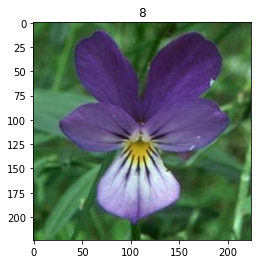

In [51]:
# selecting a random number
rand = np.random.randint(0, len(x)) 
print("Random int :",rand)

rand_img=x[rand]
plt.imshow(rand_img) 
plt.title("{}".format(y[rand]))

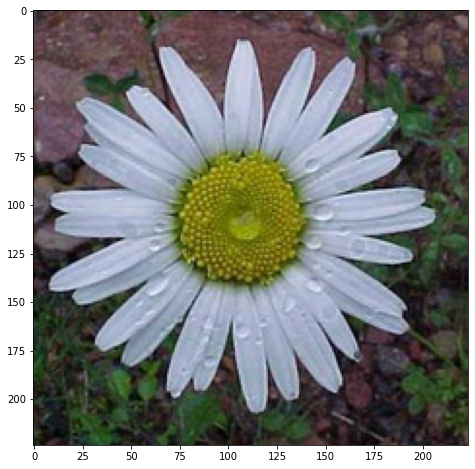

In [52]:
# Another way of selecting random image
import random

# Original Image
plt.figure(figsize=(8,8))
orig_img = random.choice(x)
plt.imshow(orig_img) 

### C. Transform the image into grayscale format and display the same. [3 Marks]

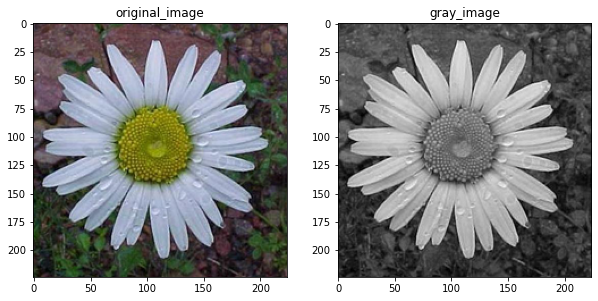

In [53]:
# Gray Image
gray_image = cv2.cvtColor(orig_img, cv2.COLOR_RGB2GRAY)

img_title = ['original_image', 'gray_image']

plt.figure(figsize=(10,10))
for i,img in enumerate([orig_img, gray_image]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

### D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


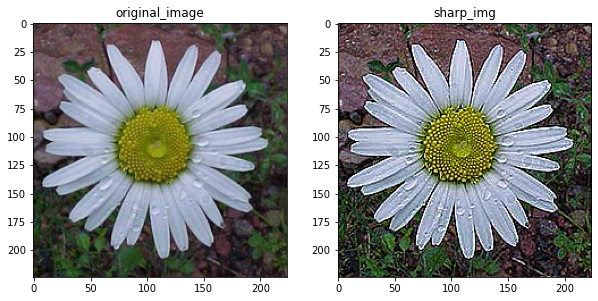

In [54]:

# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(orig_img,kernel=sharp_filter,ddepth=-1)

img_title = ['original_image', 'sharp_img']

plt.figure(figsize=(10,10))
for i,img in enumerate([orig_img, sharp_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

### E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]

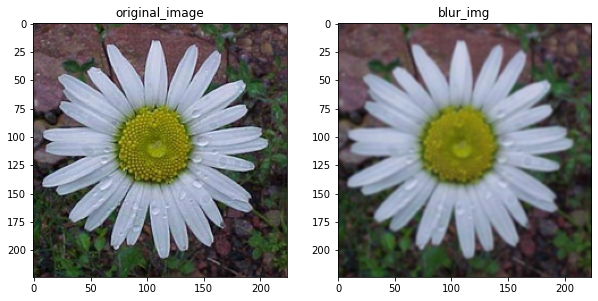

In [55]:
# Blur Image
blur_img = cv2.GaussianBlur(orig_img,ksize=(5,5),sigmaX=0,sigmaY=0)

img_title = ['original_image', 'blur_img']

plt.figure(figsize=(10,10))
for i,img in enumerate([orig_img, blur_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

### F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


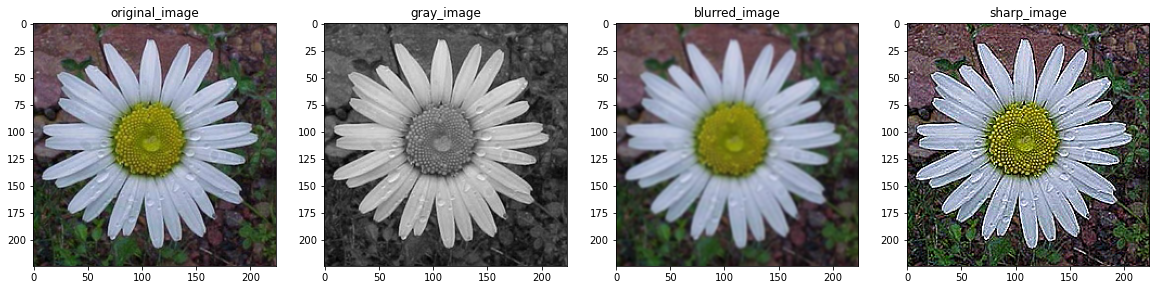

In [56]:
img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([orig_img, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

The differences are visible among original image, gray image, blurred image and sharp image

## 3. Model training and Tuning: [15 Marks]
### A. Split the data into train and test with 80:20 proportion. [2 Marks]

In [57]:
import numpy as np
X = np.array(x)
y = np.array(y)

print(X.shape, y.shape)

(1360, 224, 224, 3) (1360,)


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
print("Shape of X_train : {}".format(X_train.shape))
print("Shape of X_test  : {}".format(X_test.shape))
print("Shape of y_train : {}".format(y_train.shape))
print("Shape of y_test  : {}".format(y_test.shape))

Shape of X_train : (1088, 224, 224, 3)
Shape of X_test  : (272, 224, 224, 3)
Shape of y_train : (1088,)
Shape of y_test  : (272,)


### B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

In [59]:
# Reshaping the train and test data as per the Supervised Learning model requirement
X_train_sl = X_train.astype('float32')
X_train_sl = X_train_sl.reshape(X_train_sl.shape[0], 150528) # 224X224X3 = 150528
X_train_sl = X_train_sl/255

X_test_sl = X_test.astype('float32')
X_test_sl = X_test_sl.reshape(X_test_sl.shape[0], 150528) # 224X224X3 = 150528
X_test_sl = X_test_sl/255

print('Shape of X_train_sl : {}'.format(X_train_sl.shape))
print('Shape of X_test_sl  : {}'.format(X_test_sl.shape))
print('Shape of y_train    : {}'.format(y_train.shape))
print('Shape of y_test     : {}'.format(y_test.shape))

Shape of X_train_sl : (1088, 150528)
Shape of X_test_sl  : (272, 150528)
Shape of y_train    : (1088,)
Shape of y_test     : (272,)


In [60]:
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train_sl, y_train)

y_pred_train=lr_model.predict(X_train_sl)
lr_model_acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
print("Train Accuracy : ", lr_model_acc_train)

y_pred_test = lr_model.predict(X_test_sl)
lr_model_acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
print("Test Accuracy : ", lr_model_acc_test)

Train Accuracy :  0.5110294117647058
Test Accuracy :  0.3713235294117647


In [61]:
print('Accuracy on Training data using logistic regression model is {}'.format(lr_model.score(X_train_sl, y_train)))
print('Accuracy on Test data using logistic regression model is {}'.format(lr_model.score(X_test_sl, y_test)))

Accuracy on Training data using logistic regression model is 0.5110294117647058
Accuracy on Test data using logistic regression model is 0.3713235294117647


<AxesSubplot:>

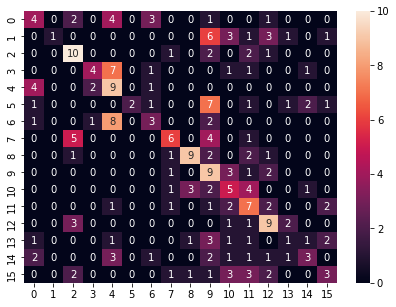

In [63]:
cm=metrics.confusion_matrix(y_test, y_pred_test, labels=[i for i in range(16)])

df_cm = pd.DataFrame(cm, index = [i for i in range(16)],
                  columns = [i for i in range(16)])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [64]:
print("classification  Matrix for logistic regression model :\n",classification_report(y_test,y_pred_test))

classification  Matrix for logistic regression model :
               precision    recall  f1-score   support

           0       0.31      0.25      0.28        16
           1       1.00      0.06      0.12        16
           2       0.43      0.62      0.51        16
           3       0.57      0.25      0.35        16
           4       0.27      0.56      0.37        16
           5       1.00      0.12      0.22        16
           6       0.30      0.19      0.23        16
           7       0.50      0.38      0.43        16
           8       0.64      0.56      0.60        16
           9       0.21      0.56      0.31        16
          10       0.25      0.31      0.28        16
          11       0.27      0.44      0.33        16
          12       0.41      0.56      0.47        16
          13       0.17      0.06      0.09        16
          14       0.38      0.19      0.25        16
          15       0.33      0.19      0.24        16
          16       0.67  

###### Insights on test data prediction:
Precision: Out of all predicted values, what fraction are predicted correctly
<br>Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

- The model has maximum correct predictions for class 16 i.e 80% 
- The model has least correct predictions for class 13 i.e 9%
- The model has 50% or more correct prediction only for 3 classes - 2,8 and 16. 
- The average f1-score is just 37%

Score accuracy for test data using logistic regression model is 37%

### C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

In [65]:
## Encoding labels of the images
from tensorflow.keras.utils import to_categorical
classes = y_df.iloc[:,0].unique()

labels = preprocessing.LabelEncoder()

labels.fit(classes)
encodedlabels = labels.transform(y_df.iloc[:,0])
print("Encoded labels are : \n{}".format(encodedlabels))

print('\nClasses            : \n{}'.format(str(labels.classes_)))
class_dict={l: i for (i, l) in enumerate(labels.classes_)}
print('\nClass dictionary   : \n{}'.format(class_dict))
y=to_categorical(encodedlabels)
print("\ny after encoding   : \n{}".format(y))

Encoded labels are : 
[11  4 15 ...  5 12  1]

Classes            : 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Class dictionary   : 
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}

y after encoding   : 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [66]:
X = np.array(x)
y = np.array(y)

print("Shape of X : {}".format(X.shape))
print("Shape of y : {}".format(y.shape))

Shape of X : (1360, 224, 224, 3)
Shape of y : (1360, 17)


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62, stratify=y)

In [68]:
# Reshaping the train and test data as per NN model requirement

X_train_nn = X_train.astype('float32')
X_train_nn = X_train_nn.reshape(X_train_nn.shape[0], 150528) # 224X224X3 = 150528
X_train_nn = X_train_nn/255

X_test_nn = X_test.astype('float32')
X_test_nn = X_test_nn.reshape(X_test_nn.shape[0], 150528) # 224X224X3 = 150528
X_test_nn = X_test_nn/255

print("Shape of X_train_nn : {}".format(X_train_nn.shape))
print("Shape of y_train    : {}".format(y_train.shape))
print("Shape of X_test_nn  : {}".format(X_test_nn.shape))
print("Shape of y_test     : {}".format(y_test.shape))

Shape of X_train_nn : (1088, 150528)
Shape of y_train    : (1088, 17)
Shape of X_test_nn  : (272, 150528)
Shape of y_test     : (272, 17)


In [69]:
# no.of classes
num_class_train = y_train.shape[1] 
print("The number of classes in train data:",num_class_train)

The number of classes in train data: 17


In [70]:
# create the nn classifier model for oxflower17 data
num_classes=num_class_train
def create_oxf_nn_model(lr,batch_size):  
    np.random.seed(100)
    oxf_nn_model = Sequential()

    # The Input Layer :
    oxf_nn_model.add(Dense(512,input_dim = X_train_nn.shape[1], activation='relu'))

    # The Hidden Layers :
    oxf_nn_model.add(Dense(256,activation='relu'))
    oxf_nn_model.add(Dropout(rate=0.2))
    oxf_nn_model.add(Dense(128,activation='relu'))
    oxf_nn_model.add(Dropout(rate=0.2))
    oxf_nn_model.add(Dense(64,activation='relu'))
    oxf_nn_model.add(Dense(64,activation='relu'))
    oxf_nn_model.add(Dropout(rate=0.2))
    oxf_nn_model.add(Dense(32,activation='relu'))

    # The Output Layer :
    oxf_nn_model.add(Dense(num_classes,activation='softmax'))

    # Compile the network :
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    oxf_nn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    oxf_nn_model.summary()
    return oxf_nn_model

In [71]:
# Best suitable parameters for this model can be 
lr=0.0001
batch_size=100
EPOCH=100

In [72]:
# Train the NN classifier model for oxflower17 data
oxf_nn_model = create_oxf_nn_model(lr,batch_size)
oxf_nn_model_fitted = oxf_nn_model.fit(X_train_nn, y_train, validation_data=(X_test_nn, y_test), epochs=EPOCH, batch_size=batch_size, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               77070848  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 64)               

Epoch 56/100
1088/1088 - 6s - loss: 1.7931 - acc: 0.3373 - val_loss: 1.9871 - val_acc: 0.3015 - 6s/epoch - 5ms/sample
Epoch 57/100
1088/1088 - 6s - loss: 1.8005 - acc: 0.3327 - val_loss: 2.0229 - val_acc: 0.3199 - 6s/epoch - 5ms/sample
Epoch 58/100
1088/1088 - 6s - loss: 1.7729 - acc: 0.3566 - val_loss: 1.9582 - val_acc: 0.3051 - 6s/epoch - 5ms/sample
Epoch 59/100
1088/1088 - 6s - loss: 1.7838 - acc: 0.3511 - val_loss: 1.9416 - val_acc: 0.2941 - 6s/epoch - 5ms/sample
Epoch 60/100
1088/1088 - 5s - loss: 1.7176 - acc: 0.3520 - val_loss: 1.9356 - val_acc: 0.2978 - 5s/epoch - 5ms/sample
Epoch 61/100
1088/1088 - 6s - loss: 1.7155 - acc: 0.3539 - val_loss: 1.9250 - val_acc: 0.3088 - 6s/epoch - 5ms/sample
Epoch 62/100
1088/1088 - 6s - loss: 1.7276 - acc: 0.3456 - val_loss: 1.9330 - val_acc: 0.3272 - 6s/epoch - 5ms/sample
Epoch 63/100
1088/1088 - 6s - loss: 1.7032 - acc: 0.3667 - val_loss: 1.9261 - val_acc: 0.3309 - 6s/epoch - 5ms/sample
Epoch 64/100
1088/1088 - 6s - loss: 1.6733 - acc: 0.3787

In [73]:
oxf_nn_model_results = oxf_nn_model.evaluate(X_test_nn, y_test)

In [74]:
print('Test loss: ', oxf_nn_model_results[0])
print('Test accuracy: ', oxf_nn_model_results[1])

Test loss:  1.8913742864833158
Test accuracy:  0.39338234


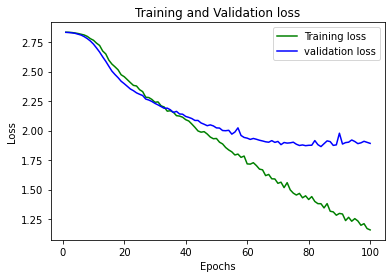

In [75]:
loss_train = oxf_nn_model_fitted.history['loss']
loss_val = oxf_nn_model_fitted.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

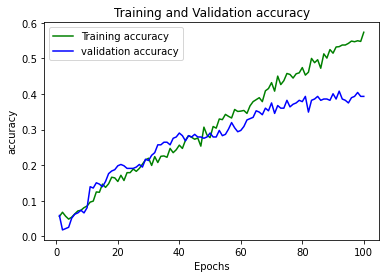

In [76]:
Acc_train = oxf_nn_model_fitted.history['acc']
Acc_val = oxf_nn_model_fitted.history['val_acc']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

The trained Neural Network model has Test accuracy of 39.33%. This is better than Supervised learning - logistic regression model.

### D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

In [77]:
# create the Cnn model for plant seedlings data
num_classes=num_class_train
def create_oxf_cnn_model():  
    # Initialising the CNN classifier
    oxf_cnn_model = Sequential()

    # Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    oxf_cnn_model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu',padding='same'))
    oxf_cnn_model.add(BatchNormalization(axis=3))

    # Add a Max Pooling layer of size 2X2
    oxf_cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

    # Add a Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
    oxf_cnn_model.add(Conv2D(64, (3, 3), activation = 'relu',padding='same'))
    oxf_cnn_model.add(BatchNormalization(axis=3))

    # Add a Max Pooling layer of size 2X2
    oxf_cnn_model.add(MaxPooling2D(pool_size = (2, 2)))


    # Add another Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
    oxf_cnn_model.add(Conv2D(128, (3, 3), activation = 'relu',padding='same'))

    # Adding another pooling layer
    oxf_cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    oxf_cnn_model.add(BatchNormalization(axis=3))
    oxf_cnn_model.add(Dropout(0.25))
    
    # Add another Convolution layer with 256 kernels of 3X3 shape with activation function ReLU
    oxf_cnn_model.add(Conv2D(256, (3, 3), activation = 'relu',padding='same'))

    # Adding another pooling layer
    oxf_cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    oxf_cnn_model.add(BatchNormalization(axis=3))
    oxf_cnn_model.add(Dropout(0.25))
    
    
    # Add another Convolution layer with 512 kernels of 3X3 shape with activation function ReLU
    oxf_cnn_model.add(Conv2D(512, (3, 3), activation = 'relu', padding='same'))

    # Adding another pooling layer
    oxf_cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    oxf_cnn_model.add(BatchNormalization(axis=3))
    oxf_cnn_model.add(Dropout(0.25))
   
    # Flattening the layer before fully connected layers
    oxf_cnn_model.add(Flatten())


    # The final output layer with 17 neuron to predict the categorical classifcation
    oxf_cnn_model.add(Dense(units = 17, activation = 'softmax'))
    
    # Compile the network :
    optimizer = tf.keras.optimizers.Adam()
    oxf_cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    oxf_cnn_model.summary()
    return oxf_cnn_model

In [78]:
# Best suitable parameters for this model can be 

# b-100,e-100,0.7242
# b-80,e-200,0.7352
epoch = 100
batch_size = 80
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=6,verbose=1, factor=0.5,min_lr=0.00001)

In [79]:
# Train the CNN classifier model for Plant seedlings data
oxf_cnn_model = create_oxf_cnn_model()
oxf_cnn_model_fitted = oxf_cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=batch_size,verbose=2,callbacks=[learning_rate_reduction])

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                

Epoch 30/100
1088/1088 - 112s - loss: 4.8984e-04 - acc: 1.0000 - val_loss: 4.5480 - val_acc: 0.3456 - lr: 5.0000e-04 - 112s/epoch - 103ms/sample
Epoch 31/100
1088/1088 - 115s - loss: 2.7729e-04 - acc: 1.0000 - val_loss: 4.3452 - val_acc: 0.3713 - lr: 5.0000e-04 - 115s/epoch - 106ms/sample
Epoch 32/100
1088/1088 - 111s - loss: 3.2144e-04 - acc: 1.0000 - val_loss: 4.1131 - val_acc: 0.3934 - lr: 5.0000e-04 - 111s/epoch - 102ms/sample
Epoch 33/100
1088/1088 - 110s - loss: 3.9222e-04 - acc: 1.0000 - val_loss: 3.7552 - val_acc: 0.4081 - lr: 5.0000e-04 - 110s/epoch - 101ms/sample
Epoch 34/100
1088/1088 - 113s - loss: 2.9567e-04 - acc: 1.0000 - val_loss: 3.5179 - val_acc: 0.4265 - lr: 5.0000e-04 - 113s/epoch - 104ms/sample
Epoch 35/100
1088/1088 - 110s - loss: 1.6256e-04 - acc: 1.0000 - val_loss: 3.3295 - val_acc: 0.4449 - lr: 5.0000e-04 - 110s/epoch - 101ms/sample
Epoch 36/100
1088/1088 - 111s - loss: 2.1471e-04 - acc: 1.0000 - val_loss: 3.1559 - val_acc: 0.4706 - lr: 5.0000e-04 - 111s/epoch 

Epoch 85/100
1088/1088 - 109s - loss: 1.2675e-04 - acc: 1.0000 - val_loss: 2.1808 - val_acc: 0.6985 - lr: 3.1250e-05 - 109s/epoch - 101ms/sample
Epoch 86/100

Epoch 86: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
1088/1088 - 111s - loss: 9.1777e-05 - acc: 1.0000 - val_loss: 2.1809 - val_acc: 0.6985 - lr: 3.1250e-05 - 111s/epoch - 102ms/sample
Epoch 87/100
1088/1088 - 110s - loss: 1.6483e-04 - acc: 1.0000 - val_loss: 2.1806 - val_acc: 0.6985 - lr: 1.5625e-05 - 110s/epoch - 101ms/sample
Epoch 88/100
1088/1088 - 110s - loss: 1.0369e-04 - acc: 1.0000 - val_loss: 2.1807 - val_acc: 0.6985 - lr: 1.5625e-05 - 110s/epoch - 101ms/sample
Epoch 89/100
1088/1088 - 111s - loss: 1.1584e-04 - acc: 1.0000 - val_loss: 2.1801 - val_acc: 0.6985 - lr: 1.5625e-05 - 111s/epoch - 102ms/sample
Epoch 90/100
1088/1088 - 112s - loss: 2.0659e-04 - acc: 1.0000 - val_loss: 2.1800 - val_acc: 0.6985 - lr: 1.5625e-05 - 112s/epoch - 103ms/sample
Epoch 91/100
1088/1088 - 112s - loss: 7.9664e-05 - 

In [80]:
oxf_cnn_model_result = oxf_cnn_model.evaluate(X_test, y_test)

In [81]:
print('Test loss: ', oxf_cnn_model_result[0])
print('Test accuracy: ', oxf_cnn_model_result[1])

Test loss:  2.1790304289144626
Test accuracy:  0.69485295


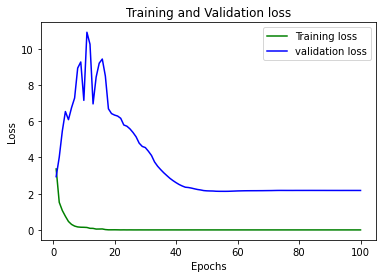

In [82]:
loss_train = oxf_cnn_model_fitted.history['loss']
loss_val = oxf_cnn_model_fitted.history['val_loss']
epochs = range(1,epoch+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

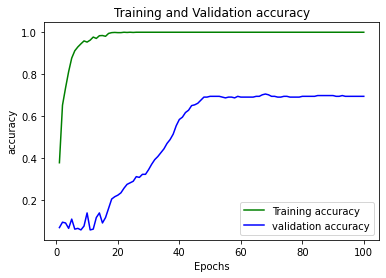

In [83]:
Acc_train = oxf_cnn_model_fitted.history['acc']
Acc_val = oxf_cnn_model_fitted.history['val_acc']
epochs = range(1,epoch+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### As we can see in the above graphs, the model has achieved 69.48% of Validation accuracy and it i stays the same after around 50 epochs, meaning no further learning. The training set has acheived 100% accuracy after some 25 epochs. For designed architecture, the model has been optimized. This model is much better than the previous Supervised learning-Logistic regression modle and Neural Network classifier models.  

In [84]:
#Saving the model for future use
oxf_cnn_model.save('./oxf_cnn_model.h5')

oxf_cnn_model.save_weights('./oxf_cnn_model_weights.h5')

### E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

Shape of the test image : (224, 224, 3)


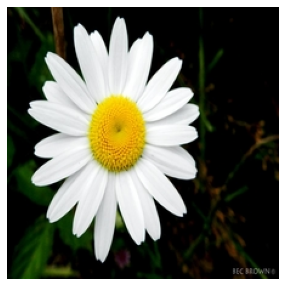

In [109]:
# Let us first show the Prediction.jpg 
plt.figure(figsize=(5,5))
tst_image = cv2.imread('./Prediction.jpg')

tst_image = cv2.resize(tst_image,(224,224))
test_image = cv2.cvtColor(tst_image, cv2.COLOR_BGR2RGB)

# Shape of the test image
print("Shape of the test image : {}".format(test_image.shape))

plt.imshow(test_image) 
plt.axis('off')
plt.show()

In [110]:
import cv2
tst_image = cv2.imread('./Prediction.jpg')
# Resize the image to 224X224 shape to be compatible with the model
tst_image = cv2.resize(tst_image,(224,224))
test_image = cv2.cvtColor(tst_image, cv2.COLOR_BGR2RGB)

# Shape of the test image
print("Shape of the test image : {}".format(test_image.shape))

# Normalizing the image
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0

#Check the size of the Image
print("Shape of the test image after expand_dims : {}".format(test_image.shape))

#Predict the result of the test image
result = oxf_cnn_model.predict(test_image)

# Get the class dictionary
print("\nClass dictionary :{}".format(class_dict))

# Creating a list of classes in test set for showing the result as the folder name
prediction_class = []
for class_name,index in class_dict.items():
    prediction_class.append(class_name)
    
#Showing probabilities against each class
print("\nFinal predicted probabilities for the test image :")
print([format(i, '.12f') for i in result[0]])

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print("\nFinal predicted class for the test image : {}".format(prediction_class[predicted_index]))

Shape of the test image : (224, 224, 3)
Shape of the test image after expand_dims : (1, 224, 224, 3)

Class dictionary :{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}

Final predicted probabilities for the test image :
['0.000000000188', '0.000000000000', '0.999989032745', '0.000000000009', '0.000000000000', '0.000000000000', '0.000000000000', '0.000011020747', '0.000000000000', '0.000000000000', '0.000000000000', '0.000000000038', '0.000000000000', '0.000000000017', '0.000000000000', '0.000000000000', '0.000000000000']

Final predicted class for the test image : 2


#### The test image was a white flower and the predicted class also represents white flower family. The model's validation accuracy was ~70%. With this model, we were able to predict the closer family the test image belongs to. 

# THE END